# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [17]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

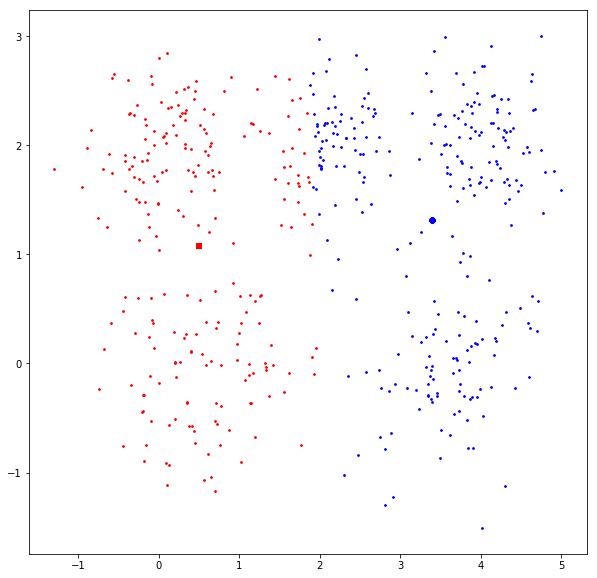

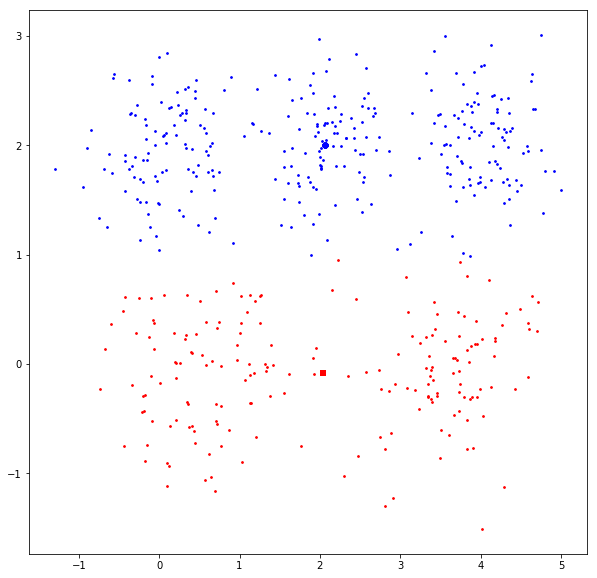

In [23]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
cntMin = 100000000000
cntMax = -1
dataMin = []
dataMax = []
x = sio.loadmat('kmeans_data.mat')['X']

for i in range(1000):    
    
    k = 2  # modify if you want
    idx, ctrs, iter_ctrs = kmeans(x, k)
    tmp = np.sum((ctrs[idx] - x) * (ctrs[idx] - x))
#     print(tmp, (ctrs[idx] - x).shape, x.shape, ctrs[idx].shape)
    if(cntMin > tmp):
        cntMin = tmp
        dataMin = [idx, ctrs, iter_ctrs]
    if(cntMax < tmp):
        cntMax = tmp
        dataMax = [idx, ctrs, iter_ctrs]
kmeans_plot(x, dataMin[0], dataMin[1], dataMin[2])
kmeans_plot(x, dataMax[0], dataMax[1], dataMax[2])

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

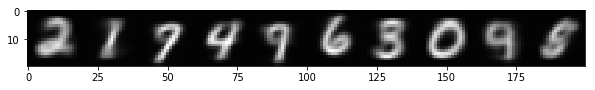

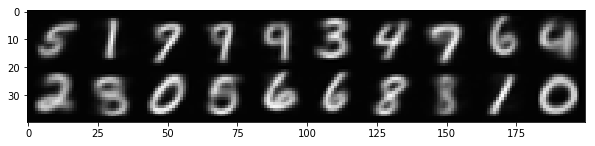

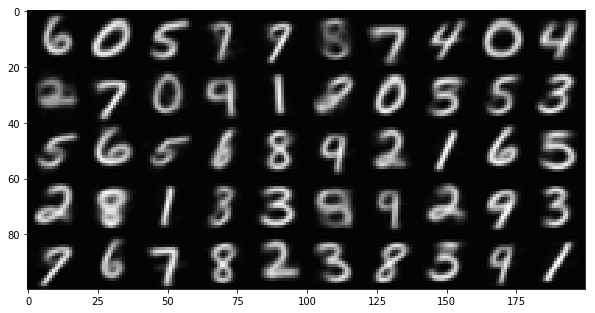

In [16]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

(849600, 3)


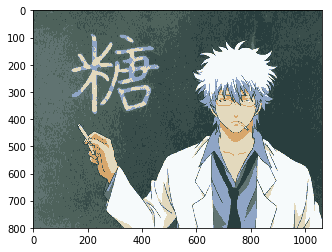

In [24]:
import kmeans
from matplotlib.pyplot import imread
img = imread('sample1.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
print(fea.shape)
# begin answer
idx, ctrs, _ = kmeans.kmeans(fea, 8)
fea_new = ctrs[idx]
# end answer

plt.imshow(fea_new.reshape(img.shape).astype(np.uint8))